In [1]:
%matplotlib inline
from sklearn import linear_model
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
from mylibs import resample
import warnings
warnings.filterwarnings("ignore")

## 2. Use sua implementação de split_k_fold a fim de fazer Cross Validation com k=5 (5-Fold) para obter o MSE de regressões para o seguinte dataset sobre a qualidade de vinhos tintos (winequality-red.csv) (para obter detalhes sobre o dataset clique aqui). Compare as seguintes técnicas de regressão (pode usar as implementações do Scikit Learn):

In [2]:
dados = np.genfromtxt("datasets/winequality-red.csv", delimiter=";", skip_header=1)

In [3]:
dados.shape

(1599, 12)

In [4]:
idx_train, idx_test = resample.split_k_fold(dados.shape[0], 5, True, 0)

### SGD - Stochastic Gradient Descent Regressor

In [5]:
modelSGD_1 = linear_model.SGDRegressor()
modelSGD_2 = linear_model.SGDRegressor()
modelSGD_3 = linear_model.SGDRegressor()
modelSGD_4 = linear_model.SGDRegressor()
modelSGD_5 = linear_model.SGDRegressor()

In [6]:
X = dados[:, 0]
y = dados[:, 1]

X_2d = [[i] for i in X]
y_2d = [[i] for i in y]

In [7]:
X_train = []
y_train = []
X_test = []
y_test = []

X_train_1 = []
y_train_1 = []
X_test_1 = []
y_test_1 = []

for i in range(len(idx_train)):
    X_train.append(X[idx_train[i]])
    y_train.append(y[idx_train[i]])
    
for i in range(len(idx_test)):
    X_test.append(X[idx_test[i]])
    y_test.append(y[idx_test[i]])

for i in range(len(idx_train)):
    X_train_1.append([[i] for i in X_train[i]])
    y_train_1.append([[i] for i in y_train[i]])

for i in range(len(idx_test)):
    X_test_1.append([[i] for i in X_test[i]])
    y_test_1.append([[i] for i in y_test[i]])



In [8]:
# Modelo 1
modelSGD_1.fit(X_train_1[0], y_train_1[0]);
y_pred_sgd_1 = modelSGD_1.predict(X_test_1[0]);
mse_sgd_1 = metrics.mean_squared_error(y_test_1[0], y_pred_sgd_1)

# Modelo 2
modelSGD_2.fit(X_train_1[1], y_train_1[1]);
y_pred_sgd_2 = modelSGD_2.predict(X_test_1[1]);
mse_sgd_2 = metrics.mean_squared_error(y_test_1[1], y_pred_sgd_2)

# Modelo 3
modelSGD_3.fit(X_train_1[2], y_train_1[2]);
y_pred_sgd_3 = modelSGD_3.predict(X_test_1[2]);
mse_sgd_3 = metrics.mean_squared_error(y_test_1[2], y_pred_sgd_3)

# Modelo 4
modelSGD_4.fit(X_train_1[3], y_train_1[3]);
y_pred_sgd_4 = modelSGD_4.predict(X_test_1[3]);
mse_sgd_4 = metrics.mean_squared_error(y_test_1[3], y_pred_sgd_4)

# Modelo 5
modelSGD_5.fit(X_train_1[4], y_train_1[4]);
y_pred_sgd_5 = modelSGD_5.predict(X_test_1[4]);
mse_sgd_5 = metrics.mean_squared_error(y_test_1[4], y_pred_sgd_5)

# Calculo da performance_sgd
performance_sgd_mse = (mse_sgd_1 + mse_sgd_2 + mse_sgd_3 + mse_sgd_4 + mse_sgd_5) / 5
print("MSE:", performance_sgd_mse)

MSE: 0.0443153206024


## Linear Regression 

In [9]:
modelLR_1 = linear_model.LinearRegression()
modelLR_2 = linear_model.LinearRegression()
modelLR_3 = linear_model.LinearRegression()
modelLR_4 = linear_model.LinearRegression()
modelLR_5 = linear_model.LinearRegression()

In [10]:
# modelo 1
modelLR_1.fit(X_train_1[0], y_train_1[0]);
y_pred_lr_1 = modelLR_1.predict(X_test_1[0]);
mse_lr_1 = metrics.mean_squared_error(y_test_1[0], y_pred_lr_1)

# Modelo 2
modelLR_2.fit(X_train_1[1], y_train_1[1]);
y_pred_lr_2 = modelLR_2.predict(X_test_1[1]);
mse_lr_2 = metrics.mean_squared_error(y_test_1[1], y_pred_lr_2)

# Modelo 3
modelLR_3.fit(X_train_1[2], y_train_1[2]);
y_pred_lr_3 = modelLR_3.predict(X_test_1[2]);
mse_lr_3 = metrics.mean_squared_error(y_test_1[2], y_pred_lr_3)

# Modelo 4
modelLR_4.fit(X_train_1[3], y_train_1[3]);
y_pred_lr_4 = modelLR_4.predict(X_test_1[3]);
mse_lr_4 = metrics.mean_squared_error(y_test_1[3], y_pred_lr_4)

# Modelo 5
modelLR_5.fit(X_train_1[4], y_train_1[4]);
y_pred_lr_5 = modelLR_5.predict(X_test_1[4]);
mse_lr_5 = metrics.mean_squared_error(y_test_1[4], y_pred_lr_5)

# Calculo da performance_lr
performance_lr_mse = (mse_lr_1 + mse_lr_2 + mse_lr_3 + mse_lr_4 + mse_lr_5) / 5
print("MSE:", performance_lr_mse)

MSE: 0.029930497035


## Linear SVR

In [11]:
modelLSVR_1 = LinearSVR()
modelLSVR_2 = LinearSVR()
modelLSVR_3 = LinearSVR()
modelLSVR_4 = LinearSVR()
modelLSVR_5 = LinearSVR()

In [12]:
# modelo 1
modelLSVR_1.fit(X_train_1[0], y_train_1[0]);
y_pred_lsvr_1 = modelLSVR_1.predict(X_test_1[0]);
mse_lsvr_1 = metrics.mean_squared_error(y_test_1[0], y_pred_lsvr_1)

# modelo 2
modelLSVR_2.fit(X_train_1[1], y_train_1[1]);
y_pred_lsvr_2 = modelLSVR_2.predict(X_test_1[1]);
mse_lsvr_2 = metrics.mean_squared_error(y_test_1[1], y_pred_lsvr_2)

# modelo 3
modelLSVR_3.fit(X_train_1[2], y_train_1[2]);
y_pred_lsvr_3 = modelLSVR_3.predict(X_test_1[2]);
mse_lsvr_3 = metrics.mean_squared_error(y_test_1[2], y_pred_lsvr_3)

# modelo 4
modelLSVR_4.fit(X_train_1[3], y_train_1[3]);
y_pred_lsvr_4 = modelLSVR_4.predict(X_test_1[3]);
mse_lsvr_4 = metrics.mean_squared_error(y_test_1[3], y_pred_lsvr_4)

# modelo 5
modelLSVR_5.fit(X_train_1[4], y_train_1[4]);
y_pred_lsvr_5 = modelLSVR_5.predict(X_test_1[4]);
mse_lsvr_5 = metrics.mean_squared_error(y_test_1[4], y_pred_lsvr_5)

# Calculo da performance_SVR
performance_lsvr_mse = (mse_lsvr_1 + mse_lsvr_2 + mse_lsvr_3 + mse_lsvr_4 + mse_lsvr_5) / 5
print("MSE:", performance_lsvr_mse)

MSE: 0.031702333287


## SVR - Epsilon-Support Vector Regression

In [13]:
modelSVR_1 = SVR()
modelSVR_2 = SVR()
modelSVR_3 = SVR()
modelSVR_4 = SVR()
modelSVR_5 = SVR()

In [14]:
# modelo 1
modelSVR_1.fit(X_train_1[0], y_train_1[0]);
y_pred_svr_1 = modelSVR_1.predict(X_test_1[0]);
mse_svr_1 = metrics.mean_squared_error(y_test_1[0], y_pred_svr_1)

# modelo 2
modelSVR_2.fit(X_train_1[1], y_train_1[1]);
y_pred_svr_2 = modelSVR_2.predict(X_test_1[1]);
mse_svr_2 = metrics.mean_squared_error(y_test_1[1], y_pred_svr_2)

# modelo 3
modelSVR_3.fit(X_train_1[2], y_train_1[2]);
y_pred_svr_3 = modelSVR_3.predict(X_test_1[2]);
mse_svr_3 = metrics.mean_squared_error(y_test_1[2], y_pred_svr_3)

# modelo 4
modelSVR_4.fit(X_train_1[3], y_train_1[3]);
y_pred_svr_4 = modelSVR_4.predict(X_test_1[3]);
mse_svr_4 = metrics.mean_squared_error(y_test_1[3], y_pred_svr_4)

# modelo 5
modelSVR_5.fit(X_train_1[4], y_train_1[4]);
y_pred_svr_5 = modelSVR_5.predict(X_test_1[4]);
mse_svr_5 = metrics.mean_squared_error(y_test_1[4], y_pred_svr_5)

# Calculo da performance_SVR
performance_svr_mse = (mse_svr_1 + mse_svr_2 + mse_svr_3 + mse_svr_4 + mse_svr_5) / 5
print("MSE:", performance_svr_mse)

MSE: 0.0297424114885


## Random Forest Regressor

In [15]:
modelRFR_1 = RandomForestRegressor()
modelRFR_2 = RandomForestRegressor()
modelRFR_3 = RandomForestRegressor()
modelRFR_4 = RandomForestRegressor()
modelRFR_5 = RandomForestRegressor()

In [16]:
# modelo 1
modelRFR_1.fit(X_train_1[0], y_train_1[0]);
y_pred_rfr_1 = modelRFR_1.predict(X_test_1[0]);
mse_rfr_1 = metrics.mean_squared_error(y_test_1[0], y_pred_rfr_1)

# modelo 2
modelRFR_2.fit(X_train_1[1], y_train_1[1]);
y_pred_rfr_2 = modelRFR_2.predict(X_test_1[1]);
mse_rfr_2 = metrics.mean_squared_error(y_test_1[1], y_pred_rfr_2)

# modelo 3
modelRFR_3.fit(X_train_1[2], y_train_1[2]);
y_pred_rfr_3 = modelRFR_3.predict(X_test_1[2]);
mse_rfr_3 = metrics.mean_squared_error(y_test_1[0], y_pred_rfr_3)

# modelo 4
modelRFR_4.fit(X_train_1[3], y_train_1[3]);
y_pred_rfr_4 = modelRFR_4.predict(X_test_1[3]);
mse_rfr_4 = metrics.mean_squared_error(y_test_1[3], y_pred_rfr_4)

# modelo 5
modelRFR_5.fit(X_train_1[4], y_train_1[4]);
y_pred_rfr_5 = modelRFR_5.predict(X_test_1[4]);
mse_rfr_5 = metrics.mean_squared_error(y_test_1[4], y_pred_rfr_5)

# Calculo da performance_RFR
performance_rfr_mse = (mse_rfr_1 + mse_rfr_2 + mse_rfr_3 + mse_rfr_4 + mse_rfr_5) / 5
print("MSE:", performance_rfr_mse)

MSE: 0.0298032440256


## Gradient Boosting Regressor

In [17]:
modelGBR_1 = GradientBoostingRegressor()
modelGBR_2 = GradientBoostingRegressor()
modelGBR_3 = GradientBoostingRegressor()
modelGBR_4 = GradientBoostingRegressor()
modelGBR_5 = GradientBoostingRegressor()

In [18]:
# modelo 1
modelGBR_1.fit(X_train_1[0], y_train_1[0]);
y_pred_gbr_1 = modelGBR_1.predict(X_test_1[0]);
mse_gbr_1 = metrics.mean_squared_error(y_test_1[0], y_pred_gbr_1)

# modelo 2
modelGBR_2.fit(X_train_1[1], y_train_1[1]);
y_pred_gbr_2 = modelGBR_2.predict(X_test_1[1]);
mse_gbr_2 = metrics.mean_squared_error(y_test_1[1], y_pred_gbr_2)

# modelo 3
modelGBR_3.fit(X_train_1[2], y_train_1[2]);
y_pred_gbr_3 = modelGBR_3.predict(X_test_1[2]);
mse_gbr_3 = metrics.mean_squared_error(y_test_1[2], y_pred_gbr_3)

# modelo 4
modelGBR_4.fit(X_train_1[3], y_train_1[3]);
y_pred_gbr_4 = modelGBR_4.predict(X_test_1[3]);
mse_gbr_4 = metrics.mean_squared_error(y_test_1[3], y_pred_gbr_4)

# modelo 5
modelGBR_5.fit(X_train_1[4], y_train_1[4]);
y_pred_gbr_5 = modelGBR_5.predict(X_test_1[4]);
mse_gbr_5 = metrics.mean_squared_error(y_test_1[4], y_pred_gbr_5)

# Calculo da performance_GBR
performance_gbr_mse = (mse_gbr_1 + mse_gbr_2 + mse_gbr_3 + mse_gbr_4 + mse_gbr_5) / 5
print("MSE:", performance_gbr_mse)

MSE: 0.0294021709658


# 3. Faça um gráfico comparativo entre resultados das avaliações (Evaluation) dos modelos acima.

In [19]:
class_names = ['SGD','LR','LSVR','SVR','RFR','GBR']
class_ = [performance_sgd_mse, performance_lr_mse, performance_lsvr_mse, performance_svr_mse, performance_rfr_mse, performance_gbr_mse]
for i in range(0,len(class_names)):
    print(class_names[i] + ': ' + str(class_[i]))

SGD: 0.0443153206024
LR: 0.029930497035
LSVR: 0.031702333287
SVR: 0.0297424114885
RFR: 0.0298032440256
GBR: 0.0294021709658


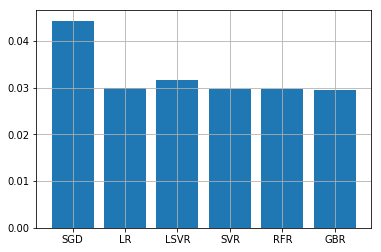

In [20]:
plt.grid();
plt.bar(range(len(class_names)),class_);
plt.xticks(range(len(class_names)), class_names);

# 4. Escolha o melhor algoritmo obtido a partir de cross validation e treine um modelo usando o dataset completo, ou seja, gere um modelo final.

In [21]:
model_final = GradientBoostingRegressor()

In [22]:
model_final.fit(X_2d, y_2d);

# 5. Qual a diferença entre Stochastic Gradient Descent e Gradient Descent?

### => Em termos relativamente simples, ambos são métodos para atualizar um conjunto de parâmetros de maneira iterativa para minimizar uma função de erro. Com gradiente descendente, você usa todos os seus dados para calcular o gradiente; com o Gradiente Descendente Estocástico você usa um subconjunto dos dados. O Gradiente Descendente Estocástico é muito mais rápido, embora a função de erro não seja tão boa.